<a href="https://colab.research.google.com/github/GiselaCS/Mujeres_Digitales/blob/main/Regresi%C3%B3n_Log%C3%ADstica_(Ejemplo_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo:

Vamos a suponer que queremos predecir cuál es la probabilidad que tiene un estudiante de aprobar un examen en función de las horas que ha estudiado. Vale mencionar que para la realización de este ejercicio, se estima que un estudiante que estudie al menos 1.75 horas aprobará el examen.

Obtenemos la siguiente salida: 
![imagen.png](attachment:imagen.png)

Podemos escribir el siguiente código python para representar los datos anteriores:

In [ ]:
# Paso 1: importamos la librería numérica NumPy
import numpy as np

# Paso 2: preparamos los datos
X = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

#Aclaración: X es las horas de estudio e y si aprueba o no el examen el alumno!

In [ ]:
X

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

In [ ]:
#Entrenamos un modelo de regresión logística
# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression
# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()
# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Hacemos la predicción para: 0.5, 1, 3 ó 6 horas de estudio...
X_nuevo = np.array([0.5, 1, 3, 6]).reshape(-1,1)

# Paso 6: Usa el modelo entrenado para obtener las predicciones con datos nuevos

prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

#Insight: Como podemos observar si estudiamos 0.5 hs o 1 hs no aprobaríamos nuestro examen!

[0 0 1 1]


In [ ]:
# Paso 7: Opcionalmente, obtenemos las probabilidades de la predicción
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
print(probabilidades_prediccion)

[[0.92858952 0.07141048]
 [0.87984046 0.12015954]
 [0.42402118 0.57597882]
 [0.02293029 0.97706971]]


In [ ]:
# Como seguramente estamos más interesados en la probabilidad de aprobar, podemos centrarnos en la segunda columna
print(probabilidades_prediccion[:,1])

[0.07141048 0.12015954 0.57597882 0.97706971]


# Funciones

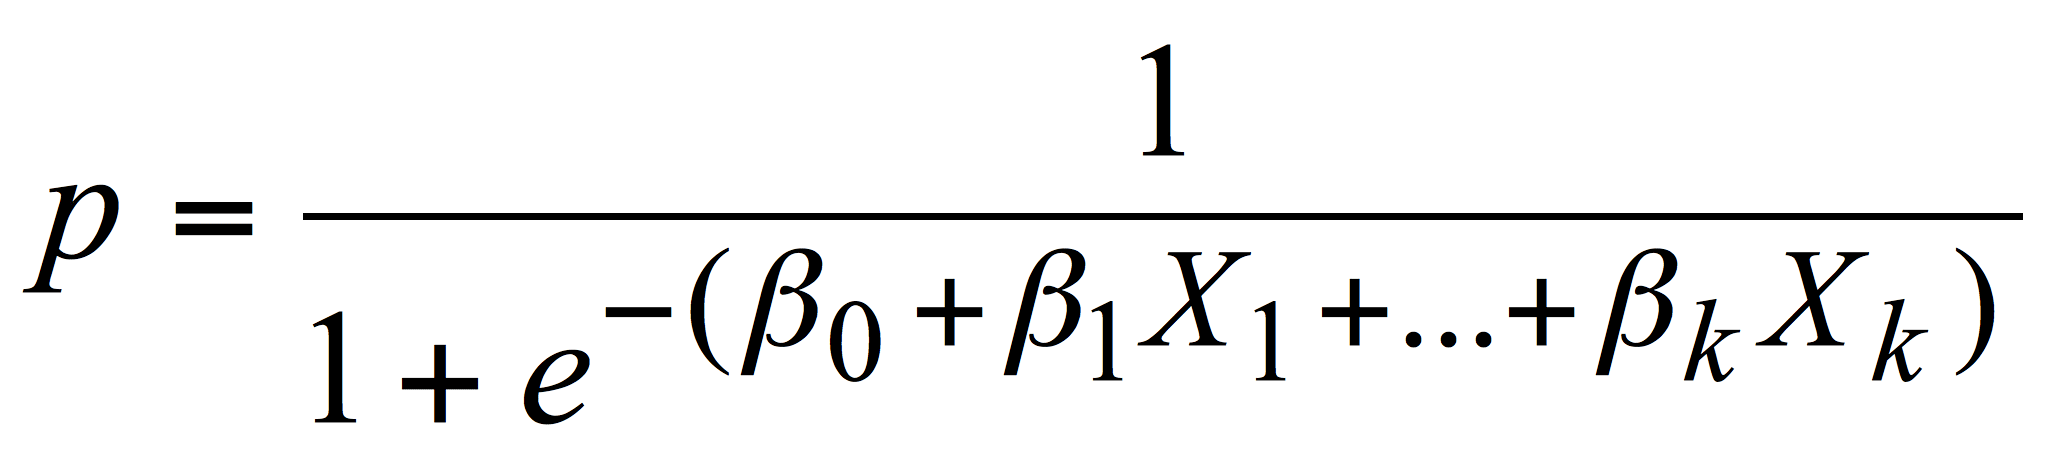

In [ ]:
intercepto=regresion_logistica.intercept_
intercepto[0]

-3.1395241070731332

In [ ]:
beta1=regresion_logistica.coef_
beta1[0][0]

1.148603864614532

In [ ]:
import pandas as pd
df= pd.DataFrame()
X1=np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5])
df['X']=X1
df['X_predicho']=df['X']*beta1[0][0]+ intercepto[0] # Calculo de los valores de X para la funcion Sigmoide
df['Probabilidades']=1/(1+np.exp(-df.X_predicho)) # Calculo de probabilidades 
df

,X,X_predicho,Probabilidades
0,0.50,-2.565222,0.071410
1,0.75,-2.278071,0.092955
2,1.00,-1.990920,0.120160
3,1.25,-1.703769,0.153974
4,1.50,-1.416618,0.195192
5,1.75,-1.129467,0.244259
6,1.75,-1.129467,0.244259
7,2.00,-0.842316,0.301047
8,2.25,-0.555165,0.364667
9,2.50,-0.268014,0.433395


In [ ]:
import pandas as pd
df= pd.DataFrame()
X1=np.array([0.5, 1, 3, 6])
df['X']=X1
df['X_predicho']=df['X']*beta1[0][0]+ intercepto[0] # Calculo de los valores de X para la funcion Sigmoide
df['Probabilidades']=1/(1+np.exp(-df.X_predicho)) # Calculo de probabilidades 
df

,X,X_predicho,Probabilidades
0,0.5,-2.565222,0.071410
1,1.0,-1.990920,0.120160
2,3.0,0.306287,0.575979
3,6.0,3.752099,0.977070


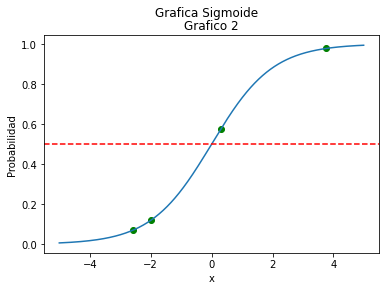

In [ ]:
import matplotlib.pyplot as plt
import math
def sigmoid(x):
  a=[]
  for item in x:
    a.append(1/(1+math.exp(-item)))
  return a
x= np.arange(-5,5,0.01)
sig=sigmoid(x)
plt.plot(x,sig)
plt.axhline(y=0.5, color='r',linestyle='--')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.title('Grafico 2')
plt.suptitle('Grafica Sigmoide')
plt.scatter(df.X_predicho,df.Probabilidades,color='g')